###importing libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline

###importing dataset

In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# training dataset shape
X_train.shape

(60000, 28, 28)

In [4]:
#  testing data set
X_test.shape

(10000, 28, 28)

###viewing single image

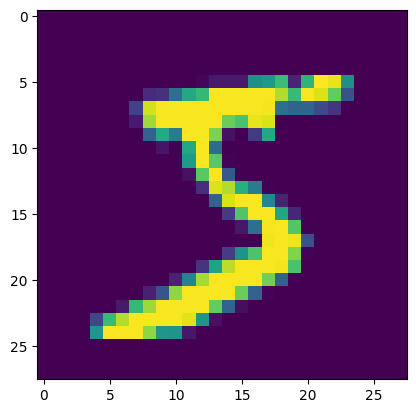

In [5]:
plt.imshow(X_train[0])

###standardizing data for similar values through out the entire dataset

In [6]:
# dividing the whole dataset values by 255 so that the values in the dataset can be between 0-1 range for standard
X_train = X_train/255
X_test = X_test/255

###building artifical dataset


In [29]:
from keras.api._v2.keras import activations
model = Sequential()

# flattening the data from 2D data to 1D data
model.add(Flatten(input_shape =(28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation ='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


###compiling and training the model

In [31]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = 'accuracy')

In [32]:
history = model.fit(X_train, y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2809 - accuracy: 0.9175 - val_loss: 0.1419 - val_accuracy: 0.9599
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1197 - accuracy: 0.9639 - val_loss: 0.1019 - val_accuracy: 0.9688
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0835 - accuracy: 0.9749 - val_loss: 0.1096 - val_accuracy: 0.9672
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0613 - accuracy: 0.9813 - val_loss: 0.1064 - val_accuracy: 0.9694
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.0951 - val_accuracy: 0.9729
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0390 - accuracy: 0.9877 - val_loss: 0.1154 - val_accuracy: 0.9694
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0328 - accuracy: 0.9888 - val_loss: 0.0920 - val_accuracy:

###predictions

In [33]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


mapping the max array value of y_prob with digits (0-9)

In [34]:
y_pred = y_prob.argmax(axis = 1)

###calculating accuracy

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9762

###ploting (loss vs val_loss) and (accuracy vs val_accuracy)

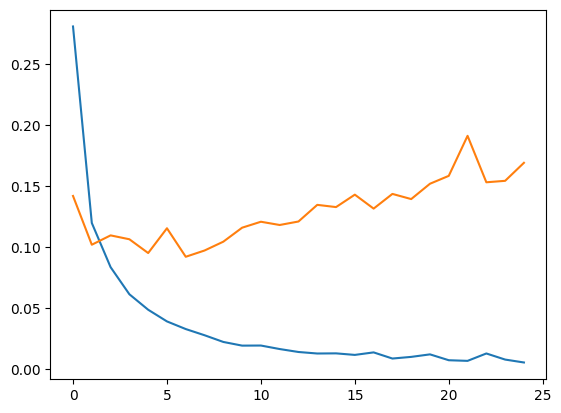

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

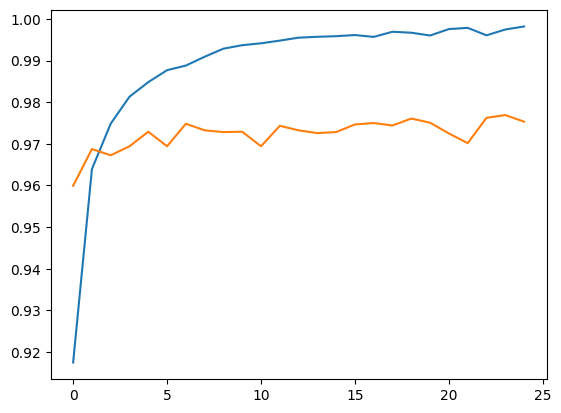

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

###prediction validation

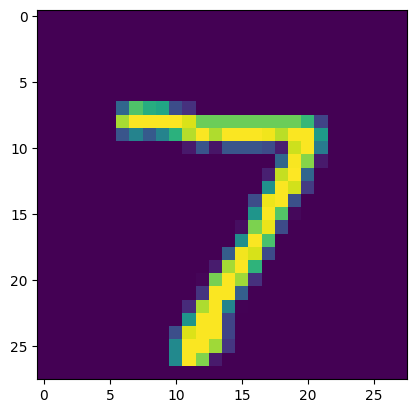

In [38]:
plt.imshow(X_test[0])

In [39]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 62ms/step


array([7])